# Navigation

---


### 1. Start the Environment

Import some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

from collections import deque
from unityagents import UnityEnvironment
from src.dqn_agent import Agent
from utils.util import save_checkpoint

%matplotlib inline

%load_ext autoreload
%autoreload 2

Load Banana Environment from Unity ML-Agents
**Note:** On MacOS you might get an `OSError: handle is closed`. In this case you should restart the Kernel of the notebook (go to Kernel tab and click on Restart).

In [2]:
env = UnityEnvironment(file_name="env/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Train Agent with (Vanilla) DQN

A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction.

In [4]:
agent = Agent(state_size=37, action_size=4, seed=0)

Episode 100	Average Score: 0.88
Episode 200	Average Score: 4.42
Episode 300	Average Score: 7.79
Episode 400	Average Score: 10.09
Episode 500	Average Score: 12.78
Episode 540	Average Score: 13.01
Environment solved in 440 episodes!	Average Score: 13.01=> Saving checkpoint...
Episode 541	Average Score: 13.04
Environment solved in 441 episodes!	Average Score: 13.04=> Saving checkpoint...
Episode 542	Average Score: 13.10
Environment solved in 442 episodes!	Average Score: 13.10=> Saving checkpoint...
Episode 543	Average Score: 13.11
Environment solved in 443 episodes!	Average Score: 13.11=> Saving checkpoint...
Episode 544	Average Score: 13.12
Environment solved in 444 episodes!	Average Score: 13.12=> Saving checkpoint...
Episode 545	Average Score: 13.17
Environment solved in 445 episodes!	Average Score: 13.17=> Saving checkpoint...
Episode 546	Average Score: 13.23
Environment solved in 446 episodes!	Average Score: 13.23=> Saving checkpoint...
Episode 547	Average Score: 13.24
Environment so

Episode 788	Average Score: 15.86
Environment solved in 688 episodes!	Average Score: 15.86=> Saving checkpoint...
Episode 789	Average Score: 15.98
Environment solved in 689 episodes!	Average Score: 15.98=> Saving checkpoint...
Episode 790	Average Score: 16.01
Environment solved in 690 episodes!	Average Score: 16.01=> Saving checkpoint...
Episode 791	Average Score: 16.07
Environment solved in 691 episodes!	Average Score: 16.07=> Saving checkpoint...
Episode 793	Average Score: 16.08
Environment solved in 693 episodes!	Average Score: 16.08=> Saving checkpoint...
Episode 797	Average Score: 16.10
Environment solved in 697 episodes!	Average Score: 16.10=> Saving checkpoint...
Episode 798	Average Score: 16.13
Environment solved in 698 episodes!	Average Score: 16.13=> Saving checkpoint...
Episode 799	Average Score: 16.17
Environment solved in 699 episodes!	Average Score: 16.17=> Saving checkpoint...
Episode 800	Average Score: 16.09
Episode 812	Average Score: 16.21
Environment solved in 712 epis

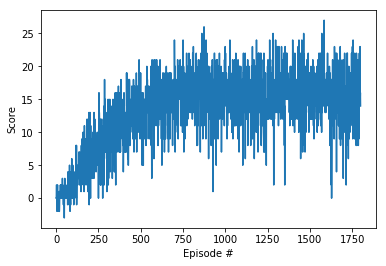

In [5]:
def dqn(n_episodes=1800, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    delta = 1e-5
    MAX_AVG_REWARD = 0.
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]           # get the current state
        score = 0                                         # initialize the score
        for t in range(max_t):                            # learn for max_t steps
            action = agent.act(state, eps)                 # choose an action by following a behavioral policy
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # observe the next state and reward
            reward = env_info.rewards[0]
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learn from experience
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        avg_reward = np.mean(scores_window)
        # Maybe log some statistics
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_reward), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_reward))
        # Note: Taks is solved if agent receives at least an average score of 13 over the last 100 episodes
        if avg_reward >= 13 and avg_reward > MAX_AVG_REWARD and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, avg_reward))
            save_checkpoint({
                'episode': i_episode,
                'state_dict': agent.qnetwork_local.state_dict(),
                'avg_reward': avg_reward
            }, 'checkpoints/checkpoint.pth')
            if abs(MAX_AVG_REWARD - avg_reward) < delta:
                break
            else:
                MAX_AVG_REWARD = avg_reward
    return scores

# train the agent
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
env.close()

### 3. Watch a Smart Agent 

In [5]:
# load load weights of qnetwork of smart agent
load_path = 'checkpoints/checkpoint.pth'
cuda = torch.cuda.is_available()

if cuda:
    checkpoint = torch.load(load_path)
else:
    # Load GPU model on CPU
    checkpoint = torch.load(load_path,
                        map_location=lambda storage, loc: storage)
agent.qnetwork_local.load_state_dict(checkpoint['state_dict'])
num_episodes_test = 1
max_t = 300

for i in range(num_episodes_test):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    for t in range(max_t):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        state = env_info.vector_observations[0]
        rewards = env_info.rewards[0]
        done = env_info.local_done[0]
        print("\rTimestep: {}\tIs it done: {}\tReward received: {}".format(t, done, rewards), end="")
        if done:
            break
env.close()

Timestep: 299	Is it done: True	Reward received: 0.000